In [4]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix



In [5]:
df = pd.read_csv("C:\\Users\\dell\\Desktop\\P24\\NAOP.csv",sep=',',engine='python')

In [6]:
df.head(10)


,Unnamed: 0,Type,Posts,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,A,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,B,'I'm finding the lack of me in these posts ver...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A,'Good one _____ https://www.youtube.com/wat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A,"'Dear INTP, I enjoyed our conversation the o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,B,'You're fired.|||That's another silly misconce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,A,'18/37 @.@|||Science is not perfect. No scien...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,A,"'No, I can't draw on my own nails (haha). Thos...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,A,'I tend to build up a collection of things on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,A,"I'm not sure, that's a good question. The dist...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,A,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Unnamed: 0', 'Type', 'Posts', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# Data Cleaning


# We, start with dropping columns with missing values

In [8]:
df=df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23'],axis='columns')

In [9]:
df.head()

,Type,Posts
0,A,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,B,'I'm finding the lack of me in these posts ver...
2,A,'Good one _____ https://www.youtube.com/wat...
3,A,"'Dear INTP, I enjoyed our conversation the o..."
4,B,'You're fired.|||That's another silly misconce...


In [10]:
df.replace('A', 1, inplace=True)

In [11]:
df.replace('B', 2, inplace=True)

In [12]:
df.replace('C', 3, inplace=True)

In [13]:
df.replace('D', 4, inplace=True)

In [14]:
df.head()

,Type,Posts
0,1,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,2,'I'm finding the lack of me in these posts ver...
2,1,'Good one _____ https://www.youtube.com/wat...
3,1,"'Dear INTP, I enjoyed our conversation the o..."
4,2,'You're fired.|||That's another silly misconce...


1    5697
2    1781
3     979
4     218
Name: Type, dtype: int64

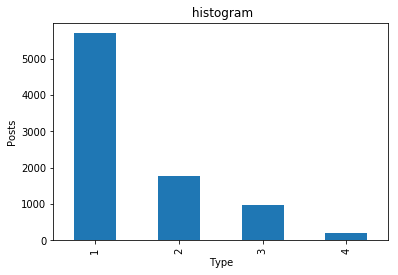

In [15]:
pd.value_counts(df['Type']).plot.bar()
plt.title(' histogram')
plt.xlabel('Type')
plt.ylabel('Posts')
df['Type'].value_counts()

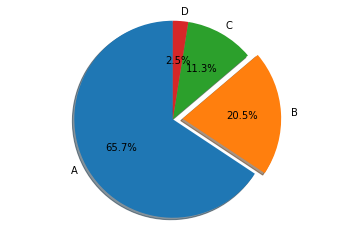

In [16]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'A', 'B', 'C', 'D'
sizes = [5697, 1781, 979, 218]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0, 0.5, 'Type')

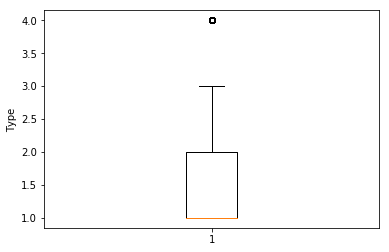

In [17]:
plt.boxplot(df['Type']);plt.ylabel("Type")

In [18]:
df.shape

(8675, 2)

In [19]:
df.info

<bound method DataFrame.info of       Type                                              Posts
0        1  http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1        2  'I'm finding the lack of me in these posts ver...
2        1  'Good one  _____   https://www.youtube.com/wat...
3        1  'Dear INTP,   I enjoyed our conversation the o...
4        2  'You're fired.|||That's another silly misconce...
5        1  '18/37 @.@|||Science  is not perfect. No scien...
6        1  'No, I can't draw on my own nails (haha). Thos...
7        1  'I tend to build up a collection of things on ...
8        1  I'm not sure, that's a good question. The dist...
9        1  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
10       1  'One time my parents were fighting over my dad...
11       2  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
12       1  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...
13       1  'Fair enough, if that's how you want to look a...
14       1  'Basically this...  https:

In [20]:
df['length']=df['Posts'].apply(len)
df.head()

,Type,Posts,length
0,1,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,4651
1,2,'I'm finding the lack of me in these posts ver...,7053
2,1,'Good one _____ https://www.youtube.com/wat...,5265
3,1,"'Dear INTP, I enjoyed our conversation the o...",6271
4,2,'You're fired.|||That's another silly misconce...,6111


In [21]:
df.isnull().sum()

Type      0
Posts     0
length    0
dtype: int64

In [22]:
df.describe()

,Type,length
count,8675.000000,8675.000000
mean,1.506398,7227.390663
std,0.791527,1624.053484
min,1.000000,57.000000
25%,1.000000,6321.500000
50%,1.000000,7513.000000
75%,2.000000,8428.000000
max,4.000000,10090.000000


# Data Visualization (Part-1)


No handles with labels found to put in legend.


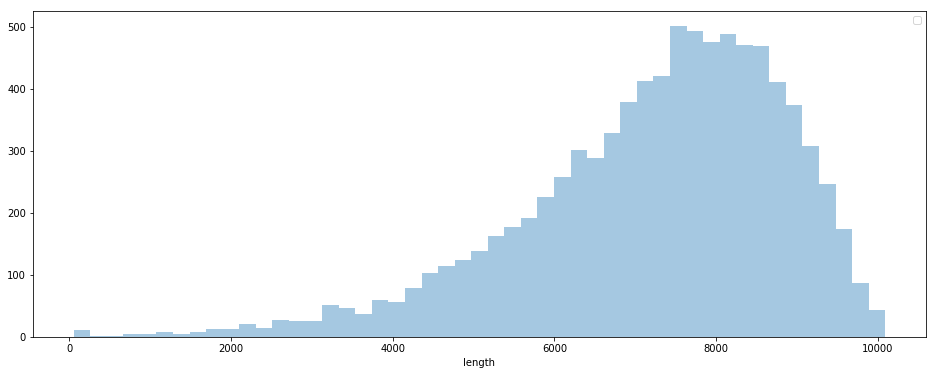

In [23]:
plt.figure(figsize=(16,6))
sns.distplot(a=df['length'],kde=False)
plt.legend()

In [24]:
message=df[df['length']==5001]['Posts']
message

6818    Wow you're young (but probably the same age wh...
8509    'That time of year already? Haven't noticed it...
Name: Posts, dtype: object

# LowerCasing, Punctuations and Vocab. modifications

In [25]:
message={"""Wow you're young (but probably the same age when I joined). I've read/seen a bit of HS like up to Act 3 or 4 I don't remember. Sorry I didn't read more of your post haa.	I think it is important actually. I don't think it should play into consideration if you watch a movie or not, but I do think it helps in choosing a movie when you don't know what to watch.	Mom: ENFP Stepdad: ENFJ Younger Sister: unknown, took test a few years ago and got ISFP if I remember right. I'd say she's more of an ESFP. Dad: unknown, my guess would be ESTJ or ISTP Self: INTP...	Daenerys gets angry too often in the TV show now. The book character is a bit more reserved... Though not by much.	Well since someone else has already guessed I'm null. If anyone's been skipped I can try to do them? I don't have cool gifs and quotes but hm.  1. Lupin from Harry Potter 2. Alex from A Clockwork...	I'll forget something, remember it, then forget, and ever repeating. Does this count?	Holidays are dumb	Er... Britney Spears -Oops I Did it Again o.o	Er... Britney Spears -Oops I Did it Again o.o	83445 Just some notes y'all don't have to read, just look at the writing. A bit scratchy, but I tried to be neat with these notes in particular.	INTP being nerdy, well not that nerdy come on.	Yes, I agree. It's annoying people are like INFP, which he seems nothing like. I was thinking INTP, but I'm not completely sure.	I would say extroverts are more likely to enjoy team sports, but that's as far as you can really go. SPs seem like your typical athletes though. It really depends on athletic ability and will though.	INTJ, perhaps ISTJ would be right It seems. Spock seems to know what is going to happen, and takes the logical course of action.	He's just a charismatic ISTP. Knows how to play the cards.	TES V/Skyrim soundtrack is amazing.. As for 8-bit, I like Tetris mixes.	My humour is mainly reference, sarcastic, witty, or slapstick.	79258	To carry out my line and blood of course. i like coming up with names too.	I'd say an InFJ or INFP, since they're seen as thoughtful and what not. I've noticed people want to be like us INTPs though, with all the recent popular characters.	oh no I was implying Redcorn wasn't intuitive. I guess dale could be an ISTP, but he has all the alien and conspiracy views.	How is hank 1w9? And Redcorn an INFP? Shouldn't gribble be ENTP?	Ahh congrats that's... Whoa.	Ah sometimes, but if I need to be one I can.	Hola minion person. Whose minion are you anyway?	Mostly Caucasian with some Native American and you could almost say middle eastern.	Some of us are in high school...	Bleh. Annoying, angry, boring, crazy, brotherly, I'm not even sure.	Astrology s fun but yea it ain't true man.	Here's a few 78677 78676 78678 78679 78680	Any of the South American countries would be good for what you do. Of course you have to check if your program coincides with the ones in other places. Some parts of Europe can be quite expensive,...	Hola! :3 what do you mean by gift of prophecy? And it's cool you like nonfiction. It's good to read about actual things sometimes.	After memory loss thing	Hehe nice. I thought is was and INFP and at one point an ISFJ? But naw I'm INTX	Haaa. I'd say most are true that i know of. ( that annoying awwwwww when theres a picture of a baby tiger) It's funny though. Where's teenage boys and etc.?	SX/SO 2w3 (I originally chose 7w6, but you already are)	Rereading all the Harry potter books.. I'm on the third.	Er, I'm an INTX and I'm in high school currently, but plan on studying astrophysics. Anyone have tips or suggestions?	INFP because you like deep stuff.	ENFJ, because you do not find puppy dogs to be cute. And you like cafés.	Thanks for choosing a fifteen minute song o.o @AyaSullivan. I would have liked it more, if it wasn't for the length. Not much to say really, it changes a lot for one.   Recycle-Nektar  ...	On here making this post, thinking about food, wanting to sleep..	77971	It's a bit hard to classify people long dead, but I'm interested nevertheless. Most are probably xNxP, seeing as it fits the type of people to compose this music.	Well I really just wanted to explore as a kid, and I liked space and dinosaurs. I guess from the time I was 4-7 I was more of an ENFP, but reverted back?	Yea brynnolf is cool. Do you have dragonborn?	Hola. There's quite a few Swedish coming onto here but I'm glad. I like your picture, donkeys are cool.	I find this really funny, I mean we all have different music taste. Nevertheless some of these are really good, I thought we'd be using some crazy YouTube parodies.	xsTP, xNTP, or xNTJ most likely. Other types would likely misjudge the situation or not realize if your grandma is trying to eat your brain out, you gotta kill her.	Keeping slaves back then and treating them kindly would be the best. If you let them free, someone would probably just shoot them or sell them when they went off. It was the norm, and he was going..."""}
lower_case=()
for i in message:
    lower_case=[i.lower()for i in message]
    print(lower_case)



["wow you're young (but probably the same age when i joined). i've read/seen a bit of hs like up to act 3 or 4 i don't remember. sorry i didn't read more of your post haa.\ti think it is important actually. i don't think it should play into consideration if you watch a movie or not, but i do think it helps in choosing a movie when you don't know what to watch.\tmom: enfp stepdad: enfj younger sister: unknown, took test a few years ago and got isfp if i remember right. i'd say she's more of an esfp. dad: unknown, my guess would be estj or istp self: intp...\tdaenerys gets angry too often in the tv show now. the book character is a bit more reserved... though not by much.\twell since someone else has already guessed i'm null. if anyone's been skipped i can try to do them? i don't have cool gifs and quotes but hm.  1. lupin from harry potter 2. alex from a clockwork...\ti'll forget something, remember it, then forget, and ever repeating. does this count?\tholidays are dumb\ter... britney 

# Now we will use punctutation for sorting out the sentences

In [26]:
sans_punctuation= []
import string

for i in lower_case:
    sans_punctuation.append(i.translate(str.maketrans('','', string.punctuation)))
print(sans_punctuation)

['wow youre young but probably the same age when i joined ive readseen a bit of hs like up to act 3 or 4 i dont remember sorry i didnt read more of your post haa\ti think it is important actually i dont think it should play into consideration if you watch a movie or not but i do think it helps in choosing a movie when you dont know what to watch\tmom enfp stepdad enfj younger sister unknown took test a few years ago and got isfp if i remember right id say shes more of an esfp dad unknown my guess would be estj or istp self intp\tdaenerys gets angry too often in the tv show now the book character is a bit more reserved though not by much\twell since someone else has already guessed im null if anyones been skipped i can try to do them i dont have cool gifs and quotes but hm  1 lupin from harry potter 2 alex from a clockwork\till forget something remember it then forget and ever repeating does this count\tholidays are dumb\ter britney spears oops i did it again oo\ter britney spears oops 

# Tokenization

In [27]:
preprocessed_documents = []
for i in sans_punctuation:
     preprocessed_documents=[[w for w in i.split()] for i in message]
print(preprocessed_documents)

[['Wow', "you're", 'young', '(but', 'probably', 'the', 'same', 'age', 'when', 'I', 'joined).', "I've", 'read/seen', 'a', 'bit', 'of', 'HS', 'like', 'up', 'to', 'Act', '3', 'or', '4', 'I', "don't", 'remember.', 'Sorry', 'I', "didn't", 'read', 'more', 'of', 'your', 'post', 'haa.', 'I', 'think', 'it', 'is', 'important', 'actually.', 'I', "don't", 'think', 'it', 'should', 'play', 'into', 'consideration', 'if', 'you', 'watch', 'a', 'movie', 'or', 'not,', 'but', 'I', 'do', 'think', 'it', 'helps', 'in', 'choosing', 'a', 'movie', 'when', 'you', "don't", 'know', 'what', 'to', 'watch.', 'Mom:', 'ENFP', 'Stepdad:', 'ENFJ', 'Younger', 'Sister:', 'unknown,', 'took', 'test', 'a', 'few', 'years', 'ago', 'and', 'got', 'ISFP', 'if', 'I', 'remember', 'right.', "I'd", 'say', "she's", 'more', 'of', 'an', 'ESFP.', 'Dad:', 'unknown,', 'my', 'guess', 'would', 'be', 'ESTJ', 'or', 'ISTP', 'Self:', 'INTP...', 'Daenerys', 'gets', 'angry', 'too', 'often', 'in', 'the', 'TV', 'show', 'now.', 'The', 'book', 'charact

# Now we begin with counting the numbers as how much is their frequency

In [28]:
import pprint
from collections import Counter
frequency_num=[]

for i in preprocessed_documents:
    frequency_count=Counter(i)
    frequency_num.append(frequency_count)
pprint.pprint(frequency_num)

[Counter({'I': 31,
          'to': 20,
          'the': 17,
          'and': 17,
          'you': 16,
          'a': 14,
          'of': 13,
          'but': 13,
          'be': 12,
          'like': 10,
          'it': 10,
          'or': 9,
          'is': 9,
          "I'm": 9,
          'are': 9,
          'would': 8,
          'an': 7,
          'have': 7,
          'was': 7,
          'your': 6,
          'if': 6,
          'in': 6,
          'say': 6,
          'not': 6,
          "don't": 5,
          'more': 5,
          'what': 5,
          'with': 5,
          'as': 5,
          'really': 5,
          'for': 5,
          'when': 4,
          'bit': 4,
          'do': 4,
          'this': 4,
          'some': 4,
          'just': 4,
          "It's": 4,
          'people': 4,
          'all': 4,
          'them': 4,
          'probably': 3,
          'think': 3,
          'know': 3,
          'few': 3,
          "I'd": 3,
          'guess': 3,
          'can': 3,
          'f

# Let's try the above with CountVectorizer tool

In [29]:
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


# Now, using count_vector i have converted the words to vocabulary as well

In [30]:
count_vector.fit(message)
voc=count_vector.get_feature_names()
voc

['1w9',
 '2w3',
 '77971',
 '78676',
 '78677',
 '78678',
 '78679',
 '78680',
 '79258',
 '7w6',
 '83445',
 'ability',
 'about',
 'act',
 'action',
 'actual',
 'actually',
 'after',
 'again',
 'age',
 'ago',
 'agree',
 'ah',
 'ahh',
 'ain',
 'alex',
 'alien',
 'all',
 'almost',
 'already',
 'amazing',
 'american',
 'an',
 'and',
 'angry',
 'annoying',
 'any',
 'anyone',
 'anyway',
 'are',
 'as',
 'astrology',
 'astrophysics',
 'at',
 'athletes',
 'athletic',
 'awwwwww',
 'ayasullivan',
 'baby',
 'back',
 'be',
 'because',
 'been',
 'being',
 'best',
 'bit',
 'bleh',
 'blood',
 'book',
 'books',
 'boring',
 'boys',
 'brain',
 'britney',
 'brotherly',
 'brynnolf',
 'but',
 'by',
 'cafés',
 'can',
 'cards',
 'carry',
 'caucasian',
 'changes',
 'character',
 'characters',
 'charismatic',
 'check',
 'choosing',
 'chose',
 'classify',
 'clockwork',
 'coincides',
 'come',
 'coming',
 'completely',
 'compose',
 'congrats',
 'consideration',
 'conspiracy',
 'cool',
 'could',
 'count',
 'countries'

# Convert the message words to array form

In [31]:
doc_to_array=count_vector.transform(voc).toarray()
doc_to_array

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

# Table created

In [32]:
frequency_matrix = pd.DataFrame(doc_to_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,1w9,2w3,77971,78676,78677,78678,78679,78680,79258,7w6,...,xnxp,xstp,yea,years,yes,you,young,younger,your,youtube
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Training and Testing the model¶

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
y=object
X=object
X_train, X_test, y_train, y_test = train_test_split(df['Posts'],df['Type'],random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 8675
Number of rows in the training set: 6506
Number of rows in the test set: 2169


In [35]:
training_data=count_vector.fit_transform(X_train)
testing_data=count_vector.transform(X_test)

In [36]:
mnb=MultinomialNB()
mnb.fit(training_data, y_train)

predictions=mnb.predict(testing_data)
mnb_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

print('precision score: ', format(precision_score(y_test,predictions,pos_label='positive',average='micro')))
print('recall score: ', format(recall_score(y_test,predictions,pos_label='positive',average='micro')))
print('f1 score: ', format(f1_score(y_test,predictions,pos_label='positive',average='micro')))

Accuracy score:  0.6565237436606731
precision score:  0.6565237436606731
recall score:  0.6565237436606731
f1 score:  0.6565237436606731


C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Using Decision Trees

In [37]:
dtc=DecisionTreeClassifier()
dtc.fit(training_data,y_train)

predictions=dtc.predict(testing_data)
dtc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('precision score: ', format(precision_score(y_test,predictions,pos_label='positive',average='micro')))
print('recall score: ', format(recall_score(y_test,predictions,pos_label='positive',average='micro')))
print('f1 score: ', format(f1_score(y_test,predictions,pos_label='positive',average='micro')))

Accuracy score:  0.6828031350852928
precision score:  0.6828031350852928
recall score:  0.6828031350852928
f1 score:  0.6828031350852928


C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# RandomForest Classifier

In [38]:
rfc=RandomForestClassifier()
rfc.fit(training_data,y_train)

predictions=rfc.predict(testing_data)
rfc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions,pos_label='positive',average='micro')))
print('recall score: ', format(recall_score(y_test,predictions,pos_label='postitive',average='micro')))
print('f1 score: ', format(f1_score(y_test,predictions,pos_label='positive',average='micro')))

Accuracy score:  0.6496081143384048
precision score:  0.6496081143384048
recall score:  0.6496081143384048
f1 score:  0.6496081143384048


C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'postitive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# KNN

In [39]:

knn=KNeighborsClassifier()
knn.fit(training_data, y_train)

predictions=knn.predict(testing_data)
knn_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions,pos_label='positive',average='micro')))
print('recall score: ', format(recall_score(y_test,predictions,pos_label='positive',average='micro')))
print('f1 score: ', format(f1_score(y_test,predictions,pos_label='positive',average='micro')))

Accuracy score:  0.6482249884739512
precision score:  0.6482249884739512
recall score:  0.6482249884739512
f1 score:  0.6482249884739512


C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Bagging Classifer

In [40]:
bgc=BaggingClassifier()
bgc.fit(training_data, y_train)

predictions=bgc.predict(testing_data)
bgc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions,pos_label='positive',average='micro')))
print('recall score: ', format(recall_score(y_test,predictions,pos_label='positive',average='micro')))
print('f1 score: ', format(f1_score(y_test,predictions,pos_label='positive',average='micro')))

Accuracy score:  0.76855693868142
precision score:  0.76855693868142
recall score:  0.76855693868142
f1 score:  0.76855693868142


C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\zkaus\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Data Visualization (Part-2)¶

# Accuracy Plots estimations

No handles with labels found to put in legend.


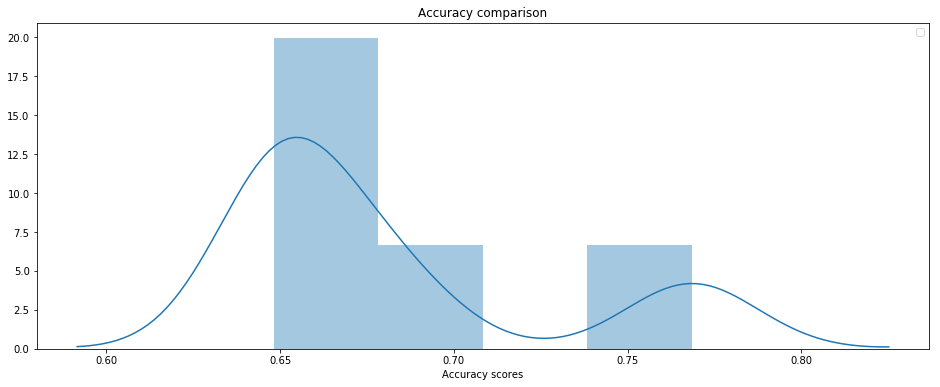

In [42]:
clf=(mnb_accuracy,dtc_accuracy,rfc_accuracy,knn_accuracy,bgc_accuracy)
plt.figure(figsize=(16,6))
sns.distplot(a=clf, hist=True)
plt.xlabel('Accuracy scores')
plt.title('Accuracy comparison')
plt.legend()

No handles with labels found to put in legend.


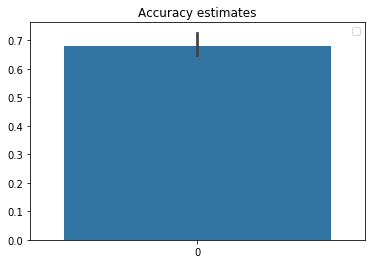

In [43]:
sns.barplot(data=clf)
plt.title('Accuracy estimates')
plt.legend()

# Confusion Matrix

In [44]:

cm=true_positive, false_negative, false_positive, true_negative = confusion_matrix(y_test,predictions)
print('True positive : ',true_positive)
print('False negative : ',false_negative)
print('False positive : ',false_positive)
print('True negative : ',true_negative)

accuracy = (true_positive + true_negative)/(true_positive + false_negative + false_positive + true_negative)
print('General accuracy : ',accuracy)

True positive :  [1305   67   37    0]
False negative :  [221 251   9   0]
False positive :  [107  10 109   1]
True negative :  [40  7  3  2]
General accuracy :  [0.80394501 0.22089552 0.25316456 0.66666667]
